In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Leer el output
data = pd.read_csv('output.csv', header=None, names=['algoritmo', 'probabilidad', 'message_len', 'decodificado_correctamente', 'correccion_falsa'])
data

,algoritmo,probabilidad,message_len,decodificado_correctamente,correccion_falsa
0,1,0.010000,2328,0,0
1,2,0.010000,2328,0,1
2,1,0.010000,3608,0,0
3,2,0.010000,3608,0,1
4,1,0.010000,2248,0,0
...,...,...,...,...,...
19281,2,0.000001,2792,1,0
19282,1,0.000001,1448,1,0
19283,2,0.000001,1448,1,0
19284,1,0.000001,1464,1,0


In [43]:
# Filtrar los datos por algoritmo
fletcher_data = data[data['algoritmo'] == 1]
hamming_data = data[data['algoritmo'] == 2]

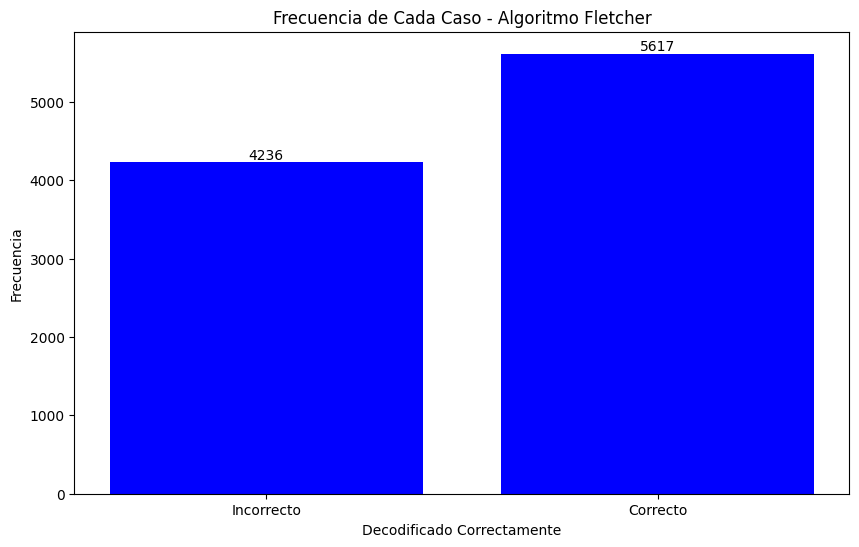

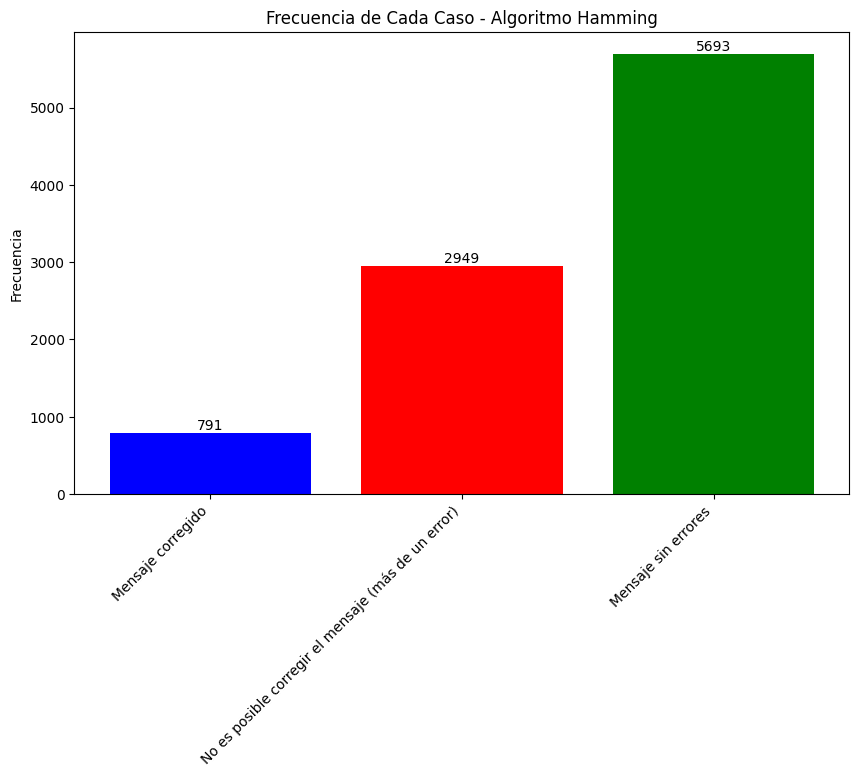

In [44]:
# Contar la frecuencia de cada combinación para Fletcher
frecuencia_fletcher = fletcher_data.groupby(['decodificado_correctamente']).size().reset_index(name='frecuencia')

# Contar la frecuencia de cada combinación para Hamming
frecuencia_hamming = hamming_data.groupby(['decodificado_correctamente', 'correccion_falsa']).size().reset_index(name='frecuencia')

# Crear la gráfica de barras para Fletcher
plt.figure(figsize=(10, 6))
bars = plt.bar(frecuencia_fletcher['decodificado_correctamente'].astype(str), frecuencia_fletcher['frecuencia'], color='blue')
plt.xlabel('Decodificado Correctamente')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cada Caso - Algoritmo Fletcher')
plt.xticks([0, 1], ['Incorrecto', 'Correcto'])

# Agregar etiquetas de frecuencia
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()

# Crear la gráfica de barras para Hamming con etiquetas descriptivas
plt.figure(figsize=(10, 6))
labels = []
bars = []
colors = []
frequencies = []
for i, row in frecuencia_hamming.iterrows():
    if row['decodificado_correctamente'] == 1:
        label = 'Mensaje sin errores'
        color = 'green'
    elif row['correccion_falsa'] == 0:
        label = 'Mensaje corregido'
        color = 'blue'
    else:
        label = 'No es posible corregir el mensaje (más de un error)'
        color = 'red'
    labels.append(label)
    frequencies.append(row['frecuencia'])
    colors.append(color)

bars = plt.bar(labels, frequencies, color=colors)

plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cada Caso - Algoritmo Hamming')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de frecuencia
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()

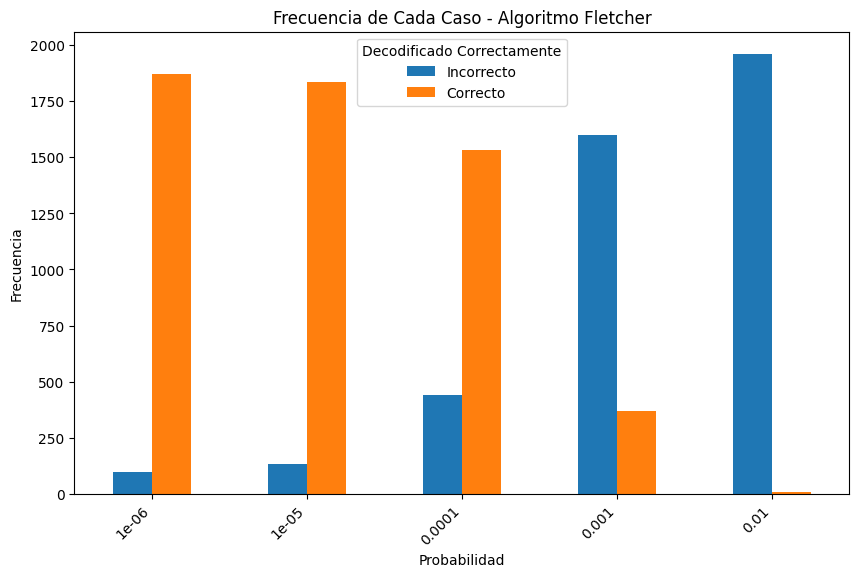

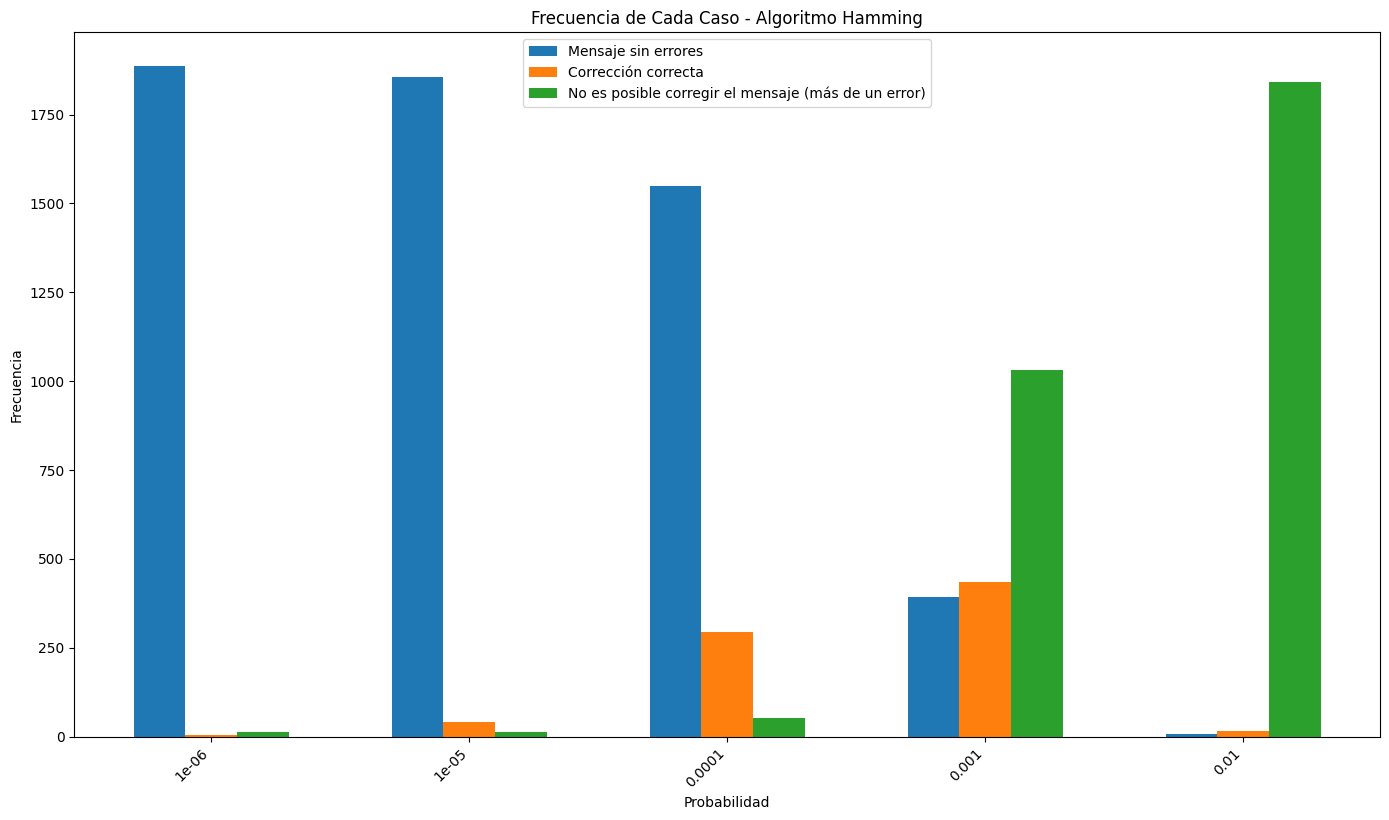

In [45]:
# Agrupar por probabilidad y decodificado_correctamente para Fletcher
frecuencia_fletcher = fletcher_data.groupby(['probabilidad', 'decodificado_correctamente']).size().unstack(fill_value=0)

# Agrupar por probabilidad, decodificado_correctamente y correccion_falsa para Hamming
frecuencia_hamming = hamming_data.groupby(['probabilidad', 'decodificado_correctamente', 'correccion_falsa']).size().unstack(fill_value=0)

# Crear la gráfica de barras agrupadas para Fletcher
frecuencia_fletcher.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cada Caso - Algoritmo Fletcher')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decodificado Correctamente', labels=['Incorrecto', 'Correcto'])
plt.show()

# Preparar datos para la gráfica de Hamming
labels = []
frequencies = {'Mensaje sin errores': [], 'Corrección correcta': [], 'No es posible corregir el mensaje (más de un error)': []}
probabilidades = sorted(hamming_data['probabilidad'].unique())

for probabilidad in probabilidades:
    subset = hamming_data[hamming_data['probabilidad'] == probabilidad]
    sin_errores = len(subset[(subset['decodificado_correctamente'] == 1)])
    correccion_correcta = len(subset[(subset['decodificado_correctamente'] == 0) & (subset['correccion_falsa'] == 0)])
    no_corregible = len(subset[(subset['decodificado_correctamente'] == 0) & (subset['correccion_falsa'] == 1)])
    
    frequencies['Mensaje sin errores'].append(sin_errores)
    frequencies['Corrección correcta'].append(correccion_correcta)
    frequencies['No es posible corregir el mensaje (más de un error)'].append(no_corregible)
    labels.append(probabilidad)

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, frequencies['Mensaje sin errores'], width, label='Mensaje sin errores')
rects2 = ax.bar(x, frequencies['Corrección correcta'], width, label='Corrección correcta')
rects3 = ax.bar(x + width, frequencies['No es posible corregir el mensaje (más de un error)'], width, label='No es posible corregir el mensaje (más de un error)')

ax.set_xlabel('Probabilidad')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Cada Caso - Algoritmo Hamming')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
data.describe()

,algoritmo,probabilidad,message_len,decodificado_correctamente,correccion_falsa
count,19286.000000,19286.000000,19286.000000,19286.000000,19286.000000
mean,1.489111,0.002208,2071.413046,0.586436,0.152909
std,0.499894,0.003899,1129.279320,0.492485,0.359909
min,1.000000,0.000001,8.000000,0.000000,0.000000
25%,1.000000,0.000010,1104.000000,0.000000,0.000000
50%,1.000000,0.000100,2096.000000,1.000000,0.000000
75%,2.000000,0.001000,3040.000000,1.000000,0.000000
max,2.000000,0.010000,4000.000000,1.000000,1.000000


C:\Users\diego\AppData\Local\Temp\ipykernel_3356\2083192782.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct['algoritmo'] = df_correct['algoritmo'].map(algorithm_names)
C:\Users\diego\AppData\Local\Temp\ipykernel_3356\2083192782.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_correct.groupby(['algoritmo', 'message_len_bins']).size().reset_index(name='counts')


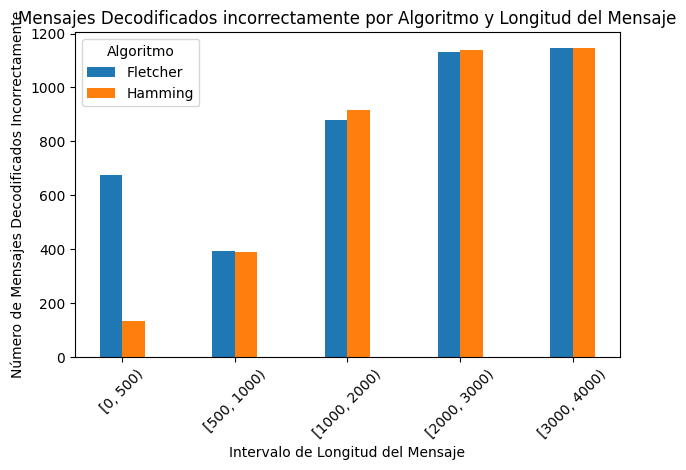

In [47]:
# Discretizar 'message_len' en intervalos
data['message_len_bins'] = pd.cut(data['message_len'], bins=[0, 500, 1000, 2000, 3000, 4000], right=False)


# Filtrar los datos donde 'decodificado_correctamente' es True
df_correct = data[data['decodificado_correctamente'] == 0]

algorithm_names = {1: 'Fletcher', 2: 'Hamming'}
df_correct['algoritmo'] = df_correct['algoritmo'].map(algorithm_names)

# Agrupar por 'algoritmo' y 'message_len_bins' y contar
grouped = df_correct.groupby(['algoritmo', 'message_len_bins']).size().reset_index(name='counts')

# Crear el gráfico de barras
algoritmos = grouped['algoritmo'].unique()
x = range(len(grouped['message_len_bins'].unique()))

# Crear barras para cada algoritmo
width = 0.2  # Ancho de cada barra
for i, alg in enumerate(algoritmos):
    alg_group = grouped[grouped['algoritmo'] == alg]
    plt.bar([p + width * i for p in x], alg_group['counts'], width=width, label=alg)

# Configuración del gráfico
plt.xlabel('Intervalo de Longitud del Mensaje')
plt.ylabel('Número de Mensajes Decodificados Incorrectamente')
plt.title('Mensajes Decodificados incorrectamente por Algoritmo y Longitud del Mensaje')
plt.xticks([p + width * (len(algoritmos) - 1) / 2 for p in x], 
           [str(interval) for interval in grouped['message_len_bins'].unique()], rotation=45)
plt.legend(title='Algoritmo')
plt.tight_layout()

# Mostrar gráfico
plt.show()